# Generate standard comparison metrics

These are a set of standard kinematics for comparing models and data.

- Mean energy binned along;
    * Radius from shower axis
    * layer
- Number of cells binned along visible cell energy
- Number of showers binned along
    * center of gravity in x
    * center of gravity in y (detector coords)
    * center of gravity in z (detector coords)
    * number of hits
    * energy sum

Lining up these distributions with geant 4 shows good simulation behaviour.

## Start with imports and configs


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from pointcloud.configs import Configs
from pointcloud.config_varients.wish_maxwell import Configs as MaxwellConfigs

from pointcloud.evaluation.bin_standard_metrics import BinnedData, get_path

configs = Configs()


## Histogramming

BinnedData is a class that takes sets of points and accumulates them for each of the binnings we are intrested in.
This class, and related uitilites are in `pointclouds/evaluation/bin_standard_metrics.py`.
We have preped and generated data in this class using `scripts/create_standard_metrics.py`.



## Data as BinnedData

For Geant 4, the accumulator and each of the models, load the generate binned data

Geant 4 is our ground truth, so it gets special treatment.

In [2]:

g4_name = "Geant 4"

def get_path_or_ref(configs, name):
    """
    Get a path to the binned data from the logdir in the configs,
    or if not found, check the reference folder.
    """
    ref_dir = "standard_metrics_ref"
    try:
        save_path = get_path(configs, name)
    except FileNotFoundError:
        save_path = ""
    if not os.path.exists(save_path):
        print(f"Didn't find binned data for {name} in {save_path}")
        ref_path = os.path.join(ref_dir, name.replace(" ", "_") + ".npz")
        print(f"Checking for stored reference in {ref_dir}")
        if os.path.exists(ref_path):
            print(f"Found stored reference")
            save_path = ref_path
    return save_path
    
#g4_save_path = get_path_or_ref(configs, g4_name)

#if not g4_save_path:
#    print(f"Can't load g4 bins, recreate with create_standard_metrics.py or this doesn't really work...")
    
# for p22
g4_save_path="/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics_p22/Geant_4.npz"
# for calochallange
g4_save_path="/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics_10-90GeV/Geant_4.npz"
g4_save_path="/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics/Geant_4.npz"
g4_save_path="/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/Geant_4_p22_th90_ph90_en10-100.npz"
binned_g4 = BinnedData.load(g4_save_path)

        

In [3]:
to_compare = {}

# Name all the models that we might have binned data for
# for p22
save_paths = {"CaloClouds Duncan gen0":"/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics_p22/CaloClouds3_DuncanGen0.npz",
                 "CaloClouds changed loss 2":"/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics_p22/Caloclouds_gunHenry3.npz",
                 "CaloClouds changed loss 3":"/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics_p22/Caloclouds_gunHenry4.npz"
                }
# for calochallange
save_paths = {"CaloClouds Duncan gen0":"/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics_10-90GeV/CaloClouds3_DuncanGen0.npz",
                 "CaloClouds changed loss 3":"/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics_10-90GeV/Calochallangecaloclouds.npz",
                }
# for anatolii

save_paths = {"CaloClouds previous":"/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics/CaloClouds_unchanged.npz",
                 "CaloClouds changed loss 3":"/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics/CaloClouds_changed_loss_3.npz",
                }

save_paths = {"CC2":"/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds2-ShowerFlow_CC2_p22_th90_ph90_en10-100.npz",
              "CC3":"/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds3-ShowerFlow_a1_fnorms_2_p22_th90_ph90_en10-100.npz"}
# model_names += [f"Wish-poly{poly_degree}" for poly_degree in range(1, 4)]
configs.logdir = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation"

for model_name, save_path in save_paths.items():
    #save_path = get_path_or_ref(configs, model_name)
    #save_path = "/beegfs/desy/user/weberdun/6_PointCloudDiffusion/log/binned_metrics/CaloClouds_Duncan_gen0.npz"
    if not save_path:
        print(f"Can't load {model_name}, recreate with create_standard_metrics.py if required")
        continue
    print(save_path)
    binned = BinnedData.load(save_path)
    to_compare[model_name] = binned

print(to_compare['CC2'])
print(binned_g4)

/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds2-ShowerFlow_CC2_p22_th90_ph90_en10-100.npz
/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds3-ShowerFlow_a1_fnorms_2_p22_th90_ph90_en10-100.npz
radius [mm] v.s. sum hits;                                   (0.00, 500.00),                2075316.0
radius [mm] v.s. sum energy [MeV];                           (0.00, 500.00),                876.0418253761425
layers v.s. sum hits;                                        (1.00, 30.00),                 2075316.0
layers v.s. sum energy [MeV];                                (1.00, 30.00),                 876.0418253761421
visible cell energy [MeV] v.s. number of cells;              (0.00, 1.00),                  2034492.0
number of hits v.s. number of showers;                       (0.00, 10000.00),              1000.0
energy sum [MeV] v.s. number of showers;                     (0.00, 10.00),                 1000.0
center of gravity X [mm] v

For only some of the distributions, we can also get data from the StatsAccumulator to compare;

In [4]:
acc_name = "Geant 4 Accumulator"
#acc_save_path = get_path_or_ref(configs, acc_name)
#acc_save_path = "/beegfs/desy/user/weberdun/6_PointCloudDiffusion/log/binned_metrics/Geant_4_Accumulator.npz"
acc_save_path = False
if acc_save_path:
    binned_acc = BinnedData.load(acc_save_path)
else:
    print(f"Can't load accumulator bins, recreate with create_standard_metrics.py if required")
    binned_acc = None
        

Can't load accumulator bins, recreate with create_standard_metrics.py if required


## Plotting

Now the samples have been generated, we can focus on histogramming them.
This may require some manual adjustment to cater for the ranges in which there are significant number of counts.

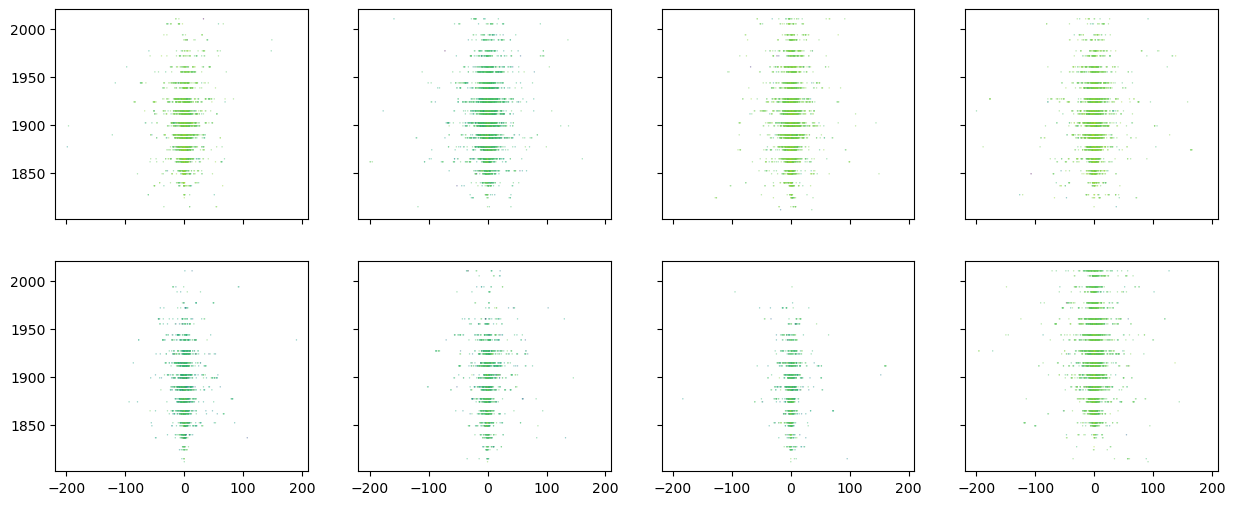

In [5]:

sample_events = binned_g4.sample_events

fig, axarr = plt.subplots(2, 4, figsize=(15, 6), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flatten()):
    xs  = sample_events[i, :, 0]
    ys = sample_events[i, :, 1]
    zs = sample_events[i, :, 2]
    es = sample_events[i, :, 3]
    mask = es>0
    ax.scatter(ys[mask], zs[mask], c=np.log(es[mask]), alpha=0.5, lw=0, s=1)
    #ax.scatter(ys[~mask], zs[~mask], c='red', alpha=0.1)

#ax.set_xlim(-200, 200)
#ax.set_ylim(1800, 2020)

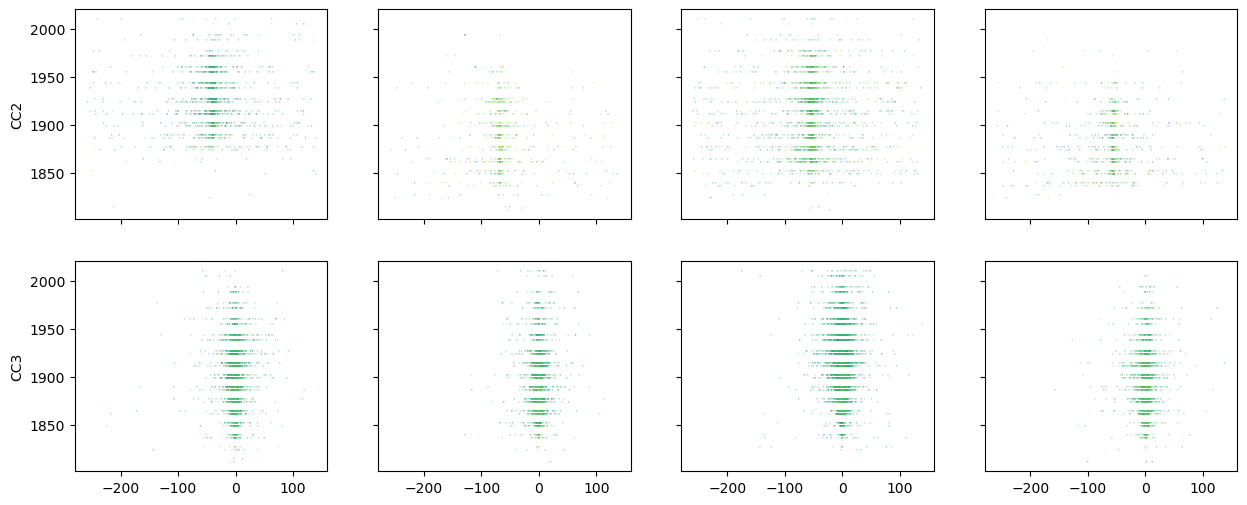

In [8]:
#name, binned = list(to_compare.items())[0]
name = "CC3"

fig, axarr = plt.subplots(2, 4, figsize=(15, 6), sharex=True, sharey=True)
for row, name in enumerate(["CC2", "CC3"]):
    ax_row = axarr[row]
    ax_row[0].set_ylabel(name)
    binned = to_compare[name]
    sample_events = binned.sample_events
        
    for i, ax in enumerate(ax_row):
        xs  = sample_events[i, :, 0]
        ys = sample_events[i, :, 1]
        zs = sample_events[i, :, 2]
        es = sample_events[i, :, 3]
        mask = es>0
        ax.scatter(xs[mask], zs[mask], c=np.log(es[mask]), alpha=0.5, lw=0, s=1)
        #ax.scatter(ys[~mask], zs[~mask], c='red', alpha=0.1)

#ax.set_xlim(-200, 200)
#ax.set_ylim(1800, 2020)

('radius [mm]', 'sum hits')
('radius [mm]', 'mean energy [MeV]')
('center of gravity X [mm]', 'number of showers')
('radius [mm]', 'sum energy [MeV]')
('layers', 'mean energy [MeV]')
('center of gravity Z [mm]', 'number of showers')
('layers', 'sum hits')
('visible cell energy [MeV]', 'number of cells')
('center of gravity Y [mm]', 'number of showers')
('layers', 'sum energy [MeV]')
('number of hits', 'number of showers')
('energy sum [MeV]', 'number of showers')
('radius [mm]', 'sum hits')
('radius [mm]', 'mean energy [MeV]')
('center of gravity X [mm]', 'number of showers')
('radius [mm]', 'sum energy [MeV]')
('layers', 'mean energy [MeV]')
('center of gravity Z [mm]', 'number of showers')
('layers', 'sum hits')
('visible cell energy [MeV]', 'number of cells')
('center of gravity Y [mm]', 'number of showers')
('layers', 'sum energy [MeV]')
('number of hits', 'number of showers')
('energy sum [MeV]', 'number of showers')


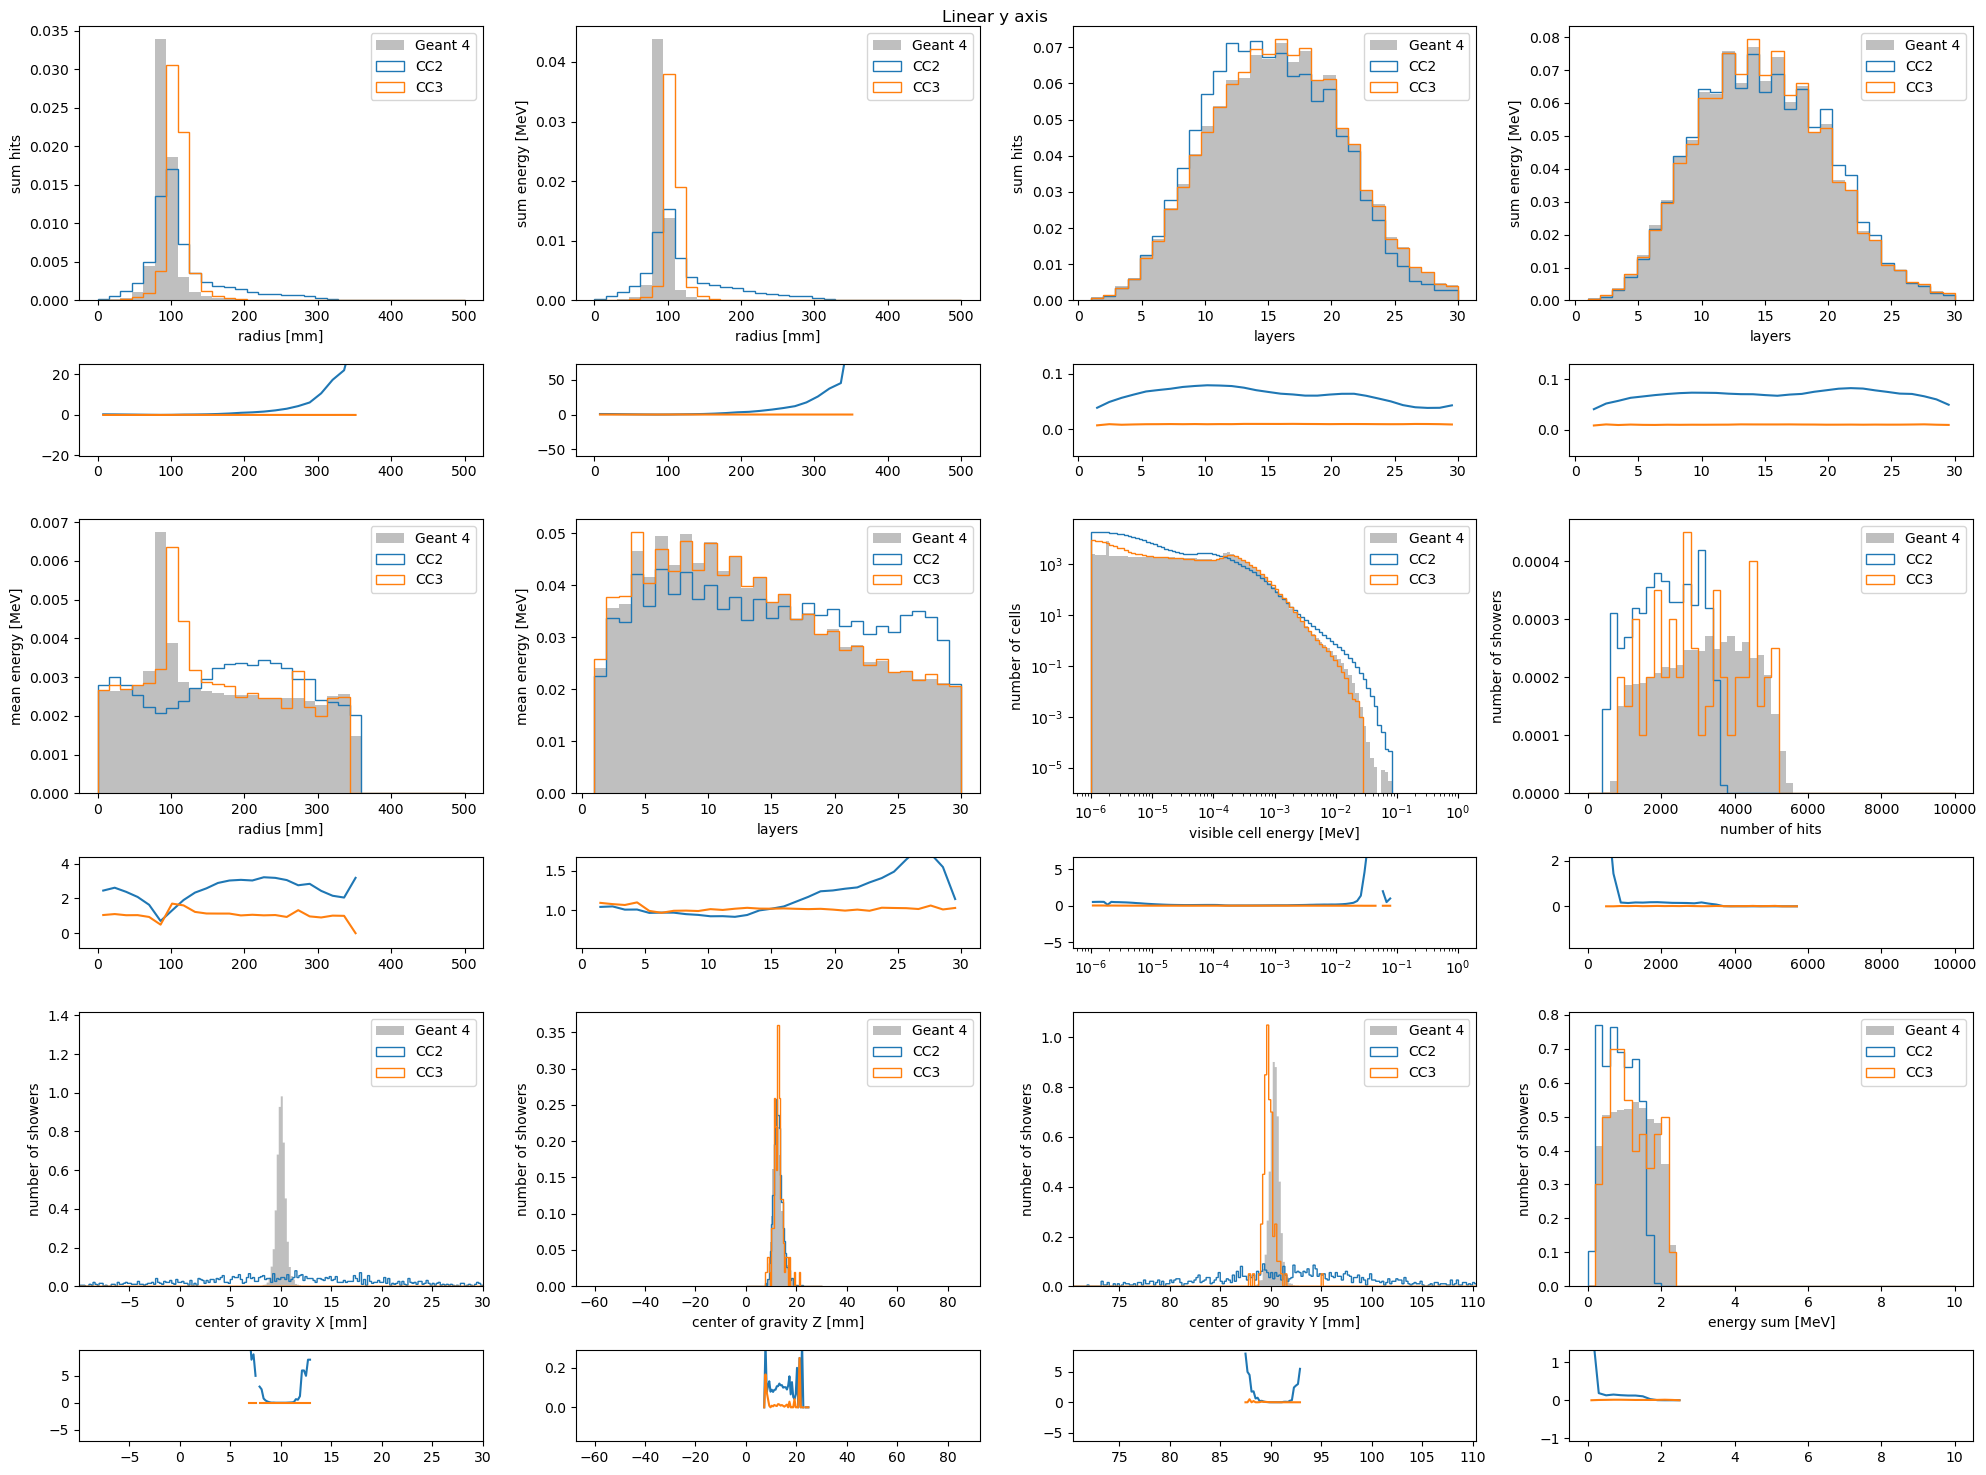

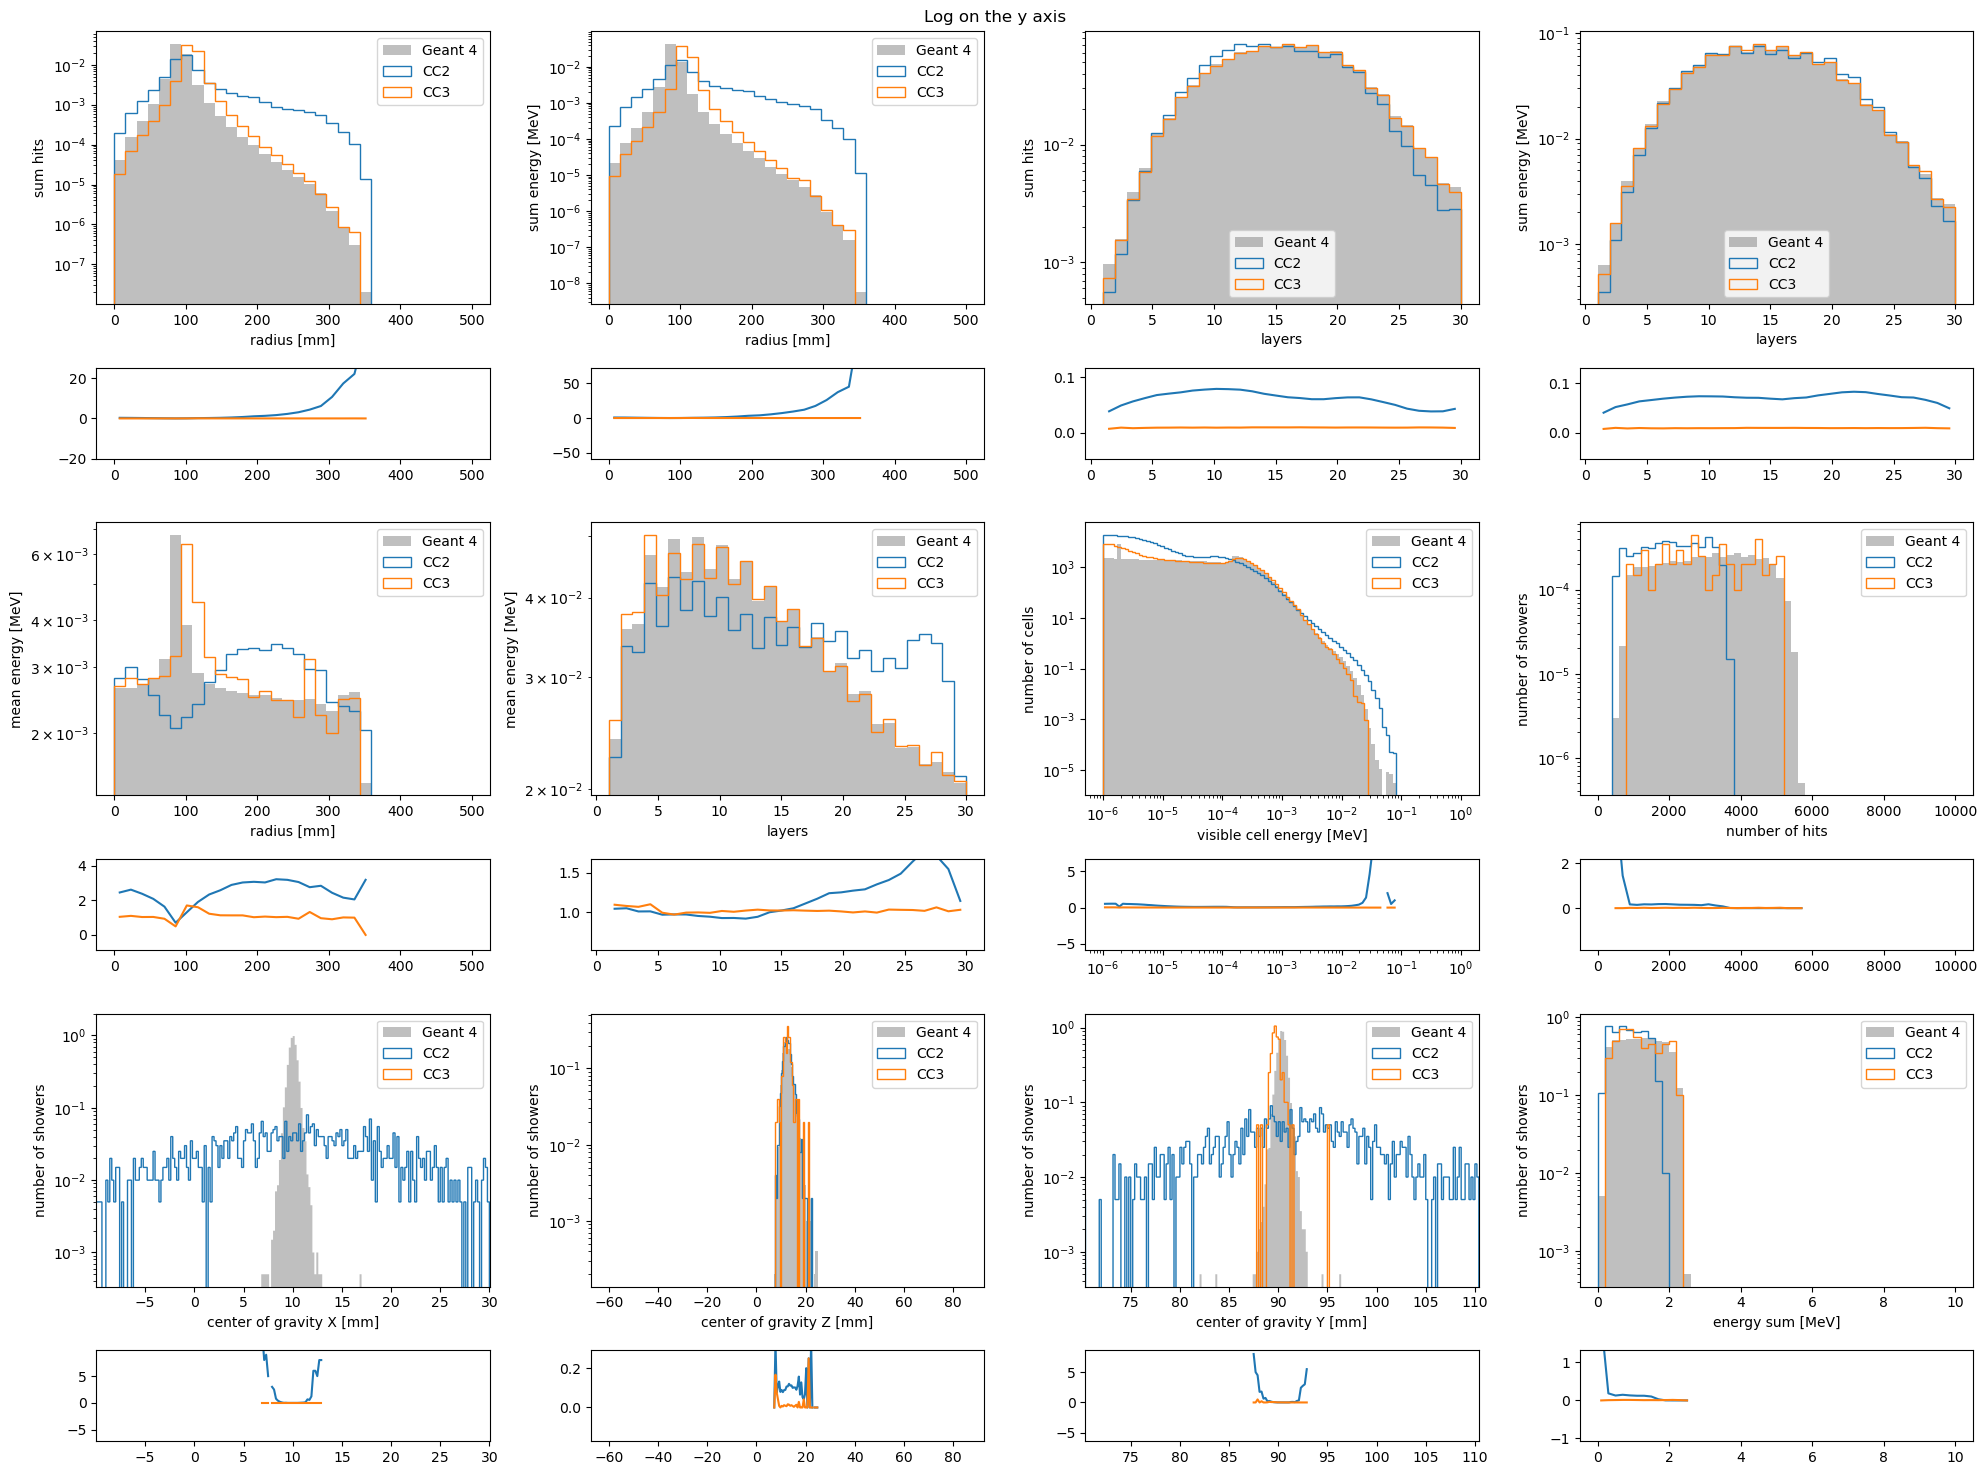

In [7]:
hist_idx_order = [0, 10, 7, 1, 11, 9, 2, 4, 8, 3, 5, 6]

n_plts = len(hist_idx_order)
n_rows = int(n_plts/4)
height_ratios = [3, 1]*n_rows

for semilogy in [False, True]:
        
    fig, ax_arr = plt.subplots(2*n_rows, 4, figsize=(20,5*n_rows), gridspec_kw={'height_ratios':height_ratios})
    ax_arr = ax_arr.T.flatten()
    
    if semilogy:
        fig.suptitle("Log on the y axis")
    else:
        fig.suptitle("Linear y axis")
    
    model_colours = [plt.cm.tab10(i/10) for i in range(len(to_compare))]
    
    for i, hist_idx in enumerate(hist_idx_order):
        
        main_ax = ax_arr[2*i]
        ratio_ax = ax_arr[2*i+1]
        ratio_ax.sharex(main_ax)
        
        x_label = binned_g4.x_labels[hist_idx]
        main_ax.set_xlabel(x_label)
        main_ax.set_ylabel(binned_g4.y_labels[hist_idx])
        print((x_label, binned_g4.y_labels[hist_idx]))
        if semilogy:
            main_ax.semilogy()
        
        # G4
        dummy_values = binned_g4.dummy_xs(hist_idx)
        weights = binned_g4.counts[hist_idx]
        #weights = binned_g4.normed(hist_idx)
        bins = binned_g4.bins[hist_idx]
        main_ax.hist(dummy_values, bins=bins, weights=weights, label=binned_g4.name,
                     histtype="stepfilled", color="grey", alpha=0.5, density=True)

        #print(f"Sum g4 weights {np.sum(weights)}")
    
        
        # Fix some axes
        if "center of gravity" in x_label:
            center_pos = np.nansum(dummy_values*weights)/np.nansum(weights)
            if "Z" in x_label:
                half_width = 80
            else:
                half_width = 20
            try:
                main_ax.set_xlim(center_pos-half_width, center_pos+half_width)
            except ValueError as e:
                print(f"{x_label}, {center_pos}")
                print(e)
        if "visible cell energy" in x_label:
            main_ax.loglog()
            
            
        # Acc
        ratios = []
        if hist_idx in [0, 1, 2, 3, 10, 11] and binned_acc is not None:
            acc_weights = binned_acc.counts[hist_idx]
            #acc_weights = binned_acc.normed(hist_idx)
            main_ax.hist(dummy_values, bins=bins, weights=acc_weights,
                         label=binned_acc.name, histtype="step", color='k', lw=3, density=True)
            acc_ratio = acc_weights/weights
            ratio_ax.plot(dummy_values, acc_ratio, c='k', label=binned_acc.name, lw=3)
            ratios.append(acc_ratio)
        
        # models
        for colour, model_name in zip(model_colours, to_compare):
            model = to_compare[model_name]
            # bins and dummys should be the same
            model_weights = model.counts[hist_idx]
            #model_weights = model.normed(hist_idx)
            #print(model_weights)

            #print(f"Sum {model_name} weights {np.sum(model_weights):.2g}")
            
            
            main_ax.hist(dummy_values, bins=bins, weights=model_weights, label=model_name,
                         histtype="step", color=colour, density=True)
            #main_ax.plot(dummy_values, model_weights, label=f"{np.sum(model_weights):.2g}")
            
            # and the ratio
            ratio = model_weights/weights
            ratio_ax.plot(dummy_values, ratio, c=colour, label=model_name)
            ratios.append(ratio)
        
            
        all_ratios = np.concatenate(ratios)
        all_ratios = all_ratios[np.isfinite(all_ratios)]
        mean_ratio = np.nanmean(all_ratios)
        std_ratio = np.nanstd(all_ratios)
        ratio_ax.set_ylim(mean_ratio - 3*std_ratio, mean_ratio + 3*std_ratio)
        #ratio_ax.set_ylim(-1, 1)

        main_ax.legend()
    
    fig.tight_layout()
    if semilogy:
        text_ = "log_y"
    else:
        text_ = "linear_y"
    #fig.savefig("/beegfs/desy/user/weberdun/6_PointCloudDiffusion/log/binned_metrics/compare_grafic_overtrained_SF_with_"+text_+".png", dpi=300, bbox_inches='tight')
    